In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, max_error

In [2]:
%matplotlib inline
sns.set()

In [3]:
import pickle
with open('../count-power-transformer.pkl', 'rb') as inf:
    pt = pickle.load(inf)
data = pd.read_pickle('../data-fill-windspeed.pkl.xz')
print(pt, pt.lambdas_)
data.head()

PowerTransformer(copy=True, method='box-cox', standardize=False) [0.31567024]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,9.701265,3,...,0,1,0,0,0,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,7.101665,8,...,0,1,0,0,0,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,7.101665,5,...,0,1,0,0,0,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.677052,3,...,0,1,0,0,0,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.677052,0,...,0,1,0,0,0,2011,1,1,4,5


In [4]:
features = [
    'season_1', 'season_2', 'season_3', 'season_4',
    'weather_1', 'weather_2', 'weather_3', 'weather_4',
    'year', 'month', 'weekday', 'hour',
    'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
]
target = 'count_transformed'

In [5]:
x = data[features]
y = data[target]
count_original = data['count']

In [6]:
x_train, x_testing, y_train, _, _, y_testing = train_test_split(
    x, y, count_original,
    test_size=0.25, random_state=42,
)
print(
    'training set:', x_train.shape, y_train.shape,
    '\n',
    'testing set:', x_testing.shape, y_testing.shape,
)

training set: (8164, 18) (8164,) 
 testing set: (2722, 18) (2722,)


In [7]:
models=[LinearRegression(),]
model_names=['LinearRegression',]

In [8]:
for model in models:
    model.fit(x_train, y_train)

In [9]:
rmsle = []
predictions = []

for name, model in zip(model_names, models):
    y_pred = model.predict(x_testing)
    y_pred = pt.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    predictions.append(y_pred)
    rmsle.append(
        np.sqrt(
            mean_squared_log_error(
                y_pred,
                y_testing,
            )
        )
    )

result = pd.DataFrame({
    'Model': model_names,
    'RMSLE': rmsle,
})
result

,Model,RMSLE
0,LinearRegression,1.013843


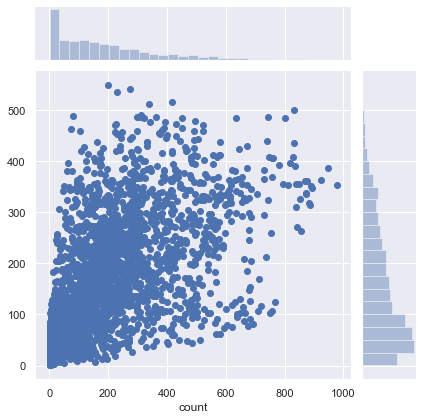

In [10]:
sns.jointplot(
    x=y_testing,
    y=y_pred,
)

In [11]:
y_pred

array([166.10070536,  24.27755472, 170.48369071, ...,  49.24661377,
        83.6996767 ,  56.66990591])

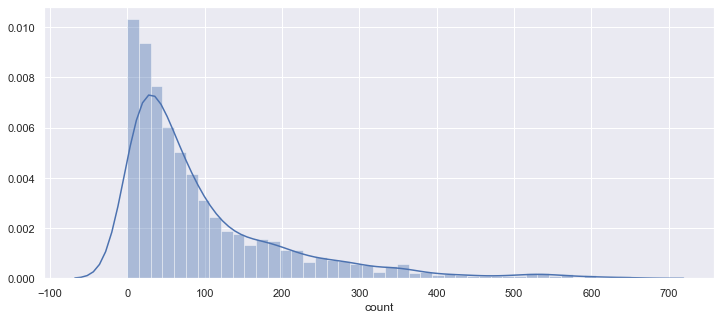

In [12]:
sns.distplot(
    np.abs(y_testing - y_pred),
)
plt.gcf().set_size_inches(12, 5)

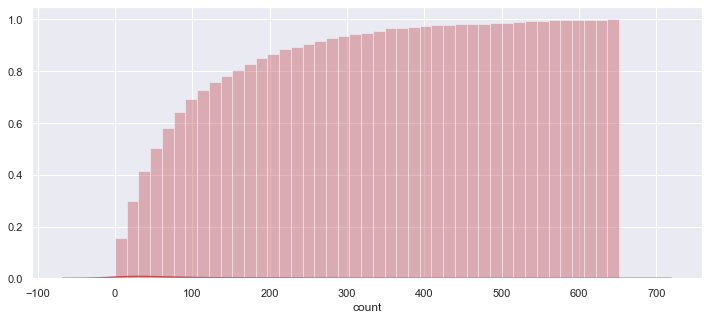

In [13]:
sns.distplot(
    np.abs(y_testing - y_pred),
    hist_kws=dict(cumulative=True),
    color='r',
)
plt.gcf().set_size_inches(12, 5)

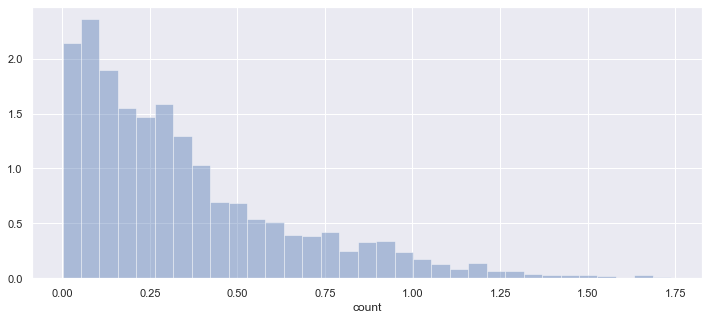

In [14]:
sns.distplot(
    np.abs(np.log10(y_testing) - np.log10(y_pred)),
    kde=False,
    norm_hist=True,
)
plt.gcf().set_size_inches(12, 5)

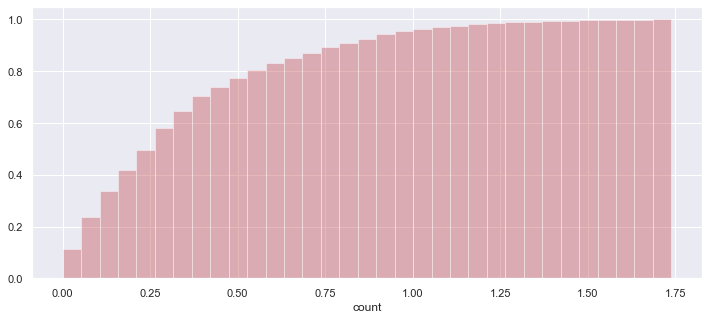

In [15]:
sns.distplot(
    np.abs(np.log10(y_testing) - np.log10(y_pred)),
    kde=False,
    norm_hist=True,
    hist_kws=dict(cumulative=True),
    color='r',
)
plt.gcf().set_size_inches(12, 5)